# **Name - Sagar Sinha**

# **Importing the libraries**

In [ ]:
#Basic computing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings("ignore")

In [ ]:
#Importing the requisite libraries for animated visualization
import plotly
import plotly.express as px
import plotly.io as pio

# **Loading the** **dataframe** 

In [ ]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin-1')
df.head(n=20)

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0   197000000001   1970       7     2  ...        0         0       0      NaN
1   197000000002   1970       0     0  ...        1         1       1      NaN
2   197001000001   1970       1     0  ...       -9         1       1      NaN
3   197001000002   1970       1     0  ...       -9         1       1      NaN
4   197001000003   1970       1     0  ...       -9         1       1      NaN
5   197001010002   1970       1     1  ...       -9         0      -9      NaN
6   197001020001   1970       1     2  ...        0         0       0      NaN
7   197001020002   1970       1     2  ...       -9         0      -9      NaN
8   197001020003   1970       1     2  ...        0         0       0      NaN
9   197001030001   1970       1     3  ...        0         0       0      NaN
10  197001050001   1970       1     1  ...        0         0       0      NaN
11  197001060001   1970       1     6  ...       -9         0      -9      NaN
12  197001080001   1970       1     8  ...       -9         1       1      NaN
13  197001090001   1970       1     9  ...       -9         0      -9      NaN
14  197001090002   1970       1     9  ...        0         0       0      NaN
15  197001100001   1970       1    10  ...        1         1       1      NaN
16  197001110001   1970       1    11  ...        1         1       1      NaN
17  197001120001   1970       1    12  ...       -9         0      -9      NaN
18  197001120002   1970       1    12  ...       -9         0      -9      NaN
19  197001130001   1970       1    13  ...       -9         0      -9      NaN

[20 rows x 135 columns]

In [ ]:
df.describe()

eventid          iyear  ...       INT_MISC        INT_ANY
count  1.816910e+05  181691.000000  ...  181691.000000  181691.000000
mean   2.002705e+11    2002.638997  ...       0.090010      -3.945952
std    1.325957e+09      13.259430  ...       0.568457       4.691325
min    1.970000e+11    1970.000000  ...      -9.000000      -9.000000
25%    1.991021e+11    1991.000000  ...       0.000000      -9.000000
50%    2.009022e+11    2009.000000  ...       0.000000       0.000000
75%    2.014081e+11    2014.000000  ...       0.000000       0.000000
max    2.017123e+11    2017.000000  ...       1.000000       1.000000

[8 rows x 77 columns]

In [ ]:
df.corr()

eventid     iyear    imonth  ...  INT_IDEO  INT_MISC   INT_ANY
eventid    1.000000  0.999996  0.002706  ... -0.133252 -0.077852 -0.175605
iyear      0.999996  1.000000  0.000139  ... -0.133253 -0.077847 -0.175596
imonth     0.002706  0.000139  1.000000  ... -0.002034 -0.002554 -0.006336
iday       0.018336  0.018254  0.005497  ... -0.001621 -0.002027 -0.001199
extended   0.091761  0.091754 -0.000468  ...  0.075147  0.027335  0.080767
...             ...       ...       ...  ...       ...       ...       ...
nreleased -0.181612 -0.181556 -0.011535  ...  0.040947  0.085055  0.064759
INT_LOG   -0.143600 -0.143601 -0.002302  ...  0.996211  0.052537  0.891051
INT_IDEO  -0.133252 -0.133253 -0.002034  ...  1.000000  0.082014  0.893811
INT_MISC  -0.077852 -0.077847 -0.002554  ...  0.082014  1.000000  0.252193
INT_ANY   -0.175605 -0.175596 -0.006336  ...  0.893811  0.252193  1.000000

[77 rows x 77 columns]

Studying the above table, there is not much correlation among various features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


Some basic preliminary analysis tells us that the dataframe has 135 columns and 11960 entries, which is quite a big dataset


# **Feature selection and Extraction**
preliminary analysis




---



In [ ]:
# Lets' check for missing values in the dataset
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
cols_with_missing
len(cols_with_missing)

106

In [ ]:
cols_with_missing_count = df.columns.isnull().sum()
cols_with_missing_count

0

In [ ]:
cols_list = df.columns.tolist()
cols_list
len(cols_list)

135

**There are no missing columns with entire data missing in the dataset.**I intend to **drop columns** with missing values more than a given **threshold(say 0.5, or about 5000 examples for now)**, cause they won't **assist in providing much sensitive data**. 
First, let's copy the dataframe to another variable.

In [ ]:
df_copy = df.copy()

df_copy.shape[1]

135

In [ ]:
threshold_missing_cols = []

for col in cols_with_missing:
  if df_copy[col].isnull().sum() > 5000:
    threshold_missing_cols.append(col)


reduced_df_copy = df_copy.drop(threshold_missing_cols, axis=1)
reduced_df_copy.shape[1]

41

In [ ]:
reduced_df_copy.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1',
       'weaptype1_txt', 'property', 'ishostkid', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

I find out that by dropping columns with missing values in quite a large number, I would be dropping columns like 'nwound' or 'nkill',
which otherwise could be used to provide great insights into the data.
So, my above hypothesis fails.

**Let's do some feature engineering on numerical features**


In [ ]:
numerical_cols = [col for col in df_copy.columns if df_copy[col].dtype != 'object']
reduced_df_copy_num = df_copy[numerical_cols]
len(numerical_cols)

77

In [ ]:
# Importing sklearn.feature_selection for filtering out numerical features based on the stated threshold
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0.2)
var_threshold.fit(reduced_df_copy_num)

VarianceThreshold(threshold=0.2)

In [ ]:
var_threshold.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

We infer that there are 12 numerical columns with variance less than the stated threshold of 0.2. Hence, we can drop them if we want to use the dataset for **predictive modelling**

In [ ]:
reduced_df_copy_num.columns[var_threshold.get_support()]

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'doubtterr', 'alternative', 'attacktype1',
       'attacktype2', 'attacktype3', 'targtype1', 'targsubtype1', 'natlty1',
       'targtype2', 'targsubtype2', 'natlty2', 'targtype3', 'targsubtype3',
       'natlty3', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claim2',
       'claimmode2', 'claim3', 'claimmode3', 'compclaim', 'weaptype1',
       'weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3',
       'weapsubtype3', 'weaptype4', 'weapsubtype4', 'nkill', 'nkillus',
       'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays',
       'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus',
       'hostkidoutcome', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

In [ ]:
less_variance_columns = [col for col in reduced_df_copy_num.columns if col not in reduced_df_copy_num.columns[var_threshold.get_support()]]
len(less_variance_columns)
reduced_df_copy_num.drop(less_variance_columns, axis=1)

eventid  iyear  imonth  iday  ...  INT_LOG  INT_IDEO  INT_MISC  INT_ANY
0       197000000001   1970       7     2  ...        0         0         0        0
1       197000000002   1970       0     0  ...        0         1         1        1
2       197001000001   1970       1     0  ...       -9        -9         1        1
3       197001000002   1970       1     0  ...       -9        -9         1        1
4       197001000003   1970       1     0  ...       -9        -9         1        1
...              ...    ...     ...   ...  ...      ...       ...       ...      ...
181686  201712310022   2017      12    31  ...        0         0         0        0
181687  201712310029   2017      12    31  ...       -9        -9         1        1
181688  201712310030   2017      12    31  ...        0         0         0        0
181689  201712310031   2017      12    31  ...       -9        -9         0       -9
181690  201712310032   2017      12    31  ...       -9        -9         0       -9

[181691 rows x 65 columns]

**Since we won't be building any pipelines for model selection and training, and only perform EDA, we don't need to deal with missing values as for now. Hence for the time being, we will be doing our visualization on the already existing features**.

# **Analysis for univariate numerical data**

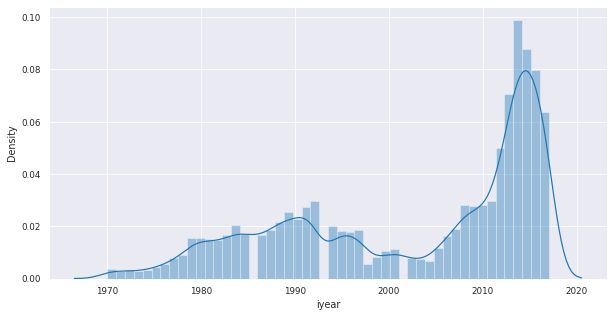

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.distplot(reduced_df_copy_num['iyear'], kde=True)

From the above distribution we can infer that the data is **negatively skewed** since the **frequency of terrorist attacks** has grown proggressively over time. It decreased during the initial years of 21st century, but since then it has sporadically increased

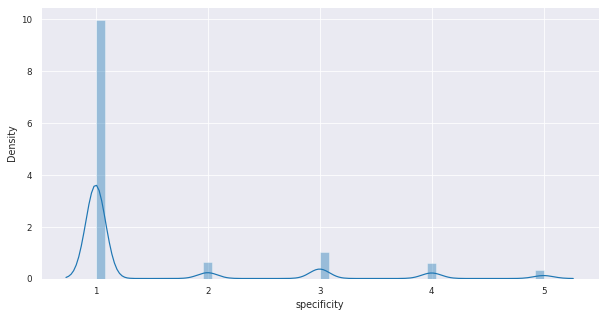

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.distplot(reduced_df_copy_num['specificity'], kde=True)

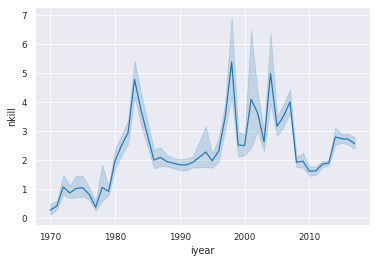

In [ ]:
sns.lineplot(x="iyear", y="nkill", data=reduced_df_copy_num)

The number of deaths in terrorist attacks has increased manifold between 1990 and 2005. Since then, it witnessed a steep decline, but has again risen after 2010

From the above plot we can infer that 

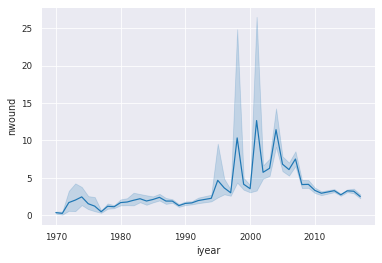

In [ ]:
sns.lineplot(x="iyear", y="nwound", data=reduced_df_copy_num)

We infer from the above lineplot that the number of injury-related cases has progressively decreased over the period of time, on an overall basis, still there are some abrupt spikes in the plot between 1985-2005 indicating that those 20 years witnessed a large rise in terrorist attacks, causing destruction of life and property on a large scale. Although, after that period and until now, the security agencies have been able to thwart the threat posed to civilians

# **Analysis of categorical and numerical data**

In [ ]:
year_count = pd.DataFrame(df_copy.groupby(['iyear', 'success']).country_txt.count().reset_index())
year_countCalc = year_count.rename(columns={'country_txt':'country_Count'})

We can analyse that from the above dataframe that terrorist groups have gradually found a bigger footing in different parts of the world.

In [ ]:
year_countCalc.head()
year_countRange = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980]

In [ ]:
df_copySuccess = df_copy.fillna(0)

**Designing an animated scatterplot for realtime visualization of kills and injuries**

---



In [ ]:
px.scatter(df_copySuccess, df_copySuccess.nkill, df_copySuccess.nwound, animation_frame='iyear', hover_name='country_txt', animation_group = 'country_txt', size='success',size_max=40, 
           range_color=[0, 1], title='No. of killed vs injured')

In [ ]:
killData = df_copy.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
killData

attacktype1_txt  Armed Assault  Assassination  ...  Unarmed Assault  Unknown
nkill                 160297.0        24920.0  ...            880.0  32381.0

[1 rows x 9 columns]

In [ ]:
killData_plot = killData.T

In [ ]:
killData_plot.reset_index()

attacktype1_txt     nkill
0                        Armed Assault  117886.0
1                        Assassination   20959.0
2                    Bombing/Explosion   96998.0
3       Facility/Infrastructure Attack    2819.0
4                            Hijacking    3585.0
5  Hostage Taking (Barricade Incident)    2139.0
6          Hostage Taking (Kidnapping)    6517.0
7                      Unarmed Assault     706.0
8                              Unknown   16075.0

In [ ]:
values = killData_plot['nkill']
labels = killData.columns
print(values.tolist())
print(labels.tolist())

[117886.0, 20959.0, 96998.0, 2819.0, 3585.0, 2139.0, 6517.0, 706.0, 16075.0]
['Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown']


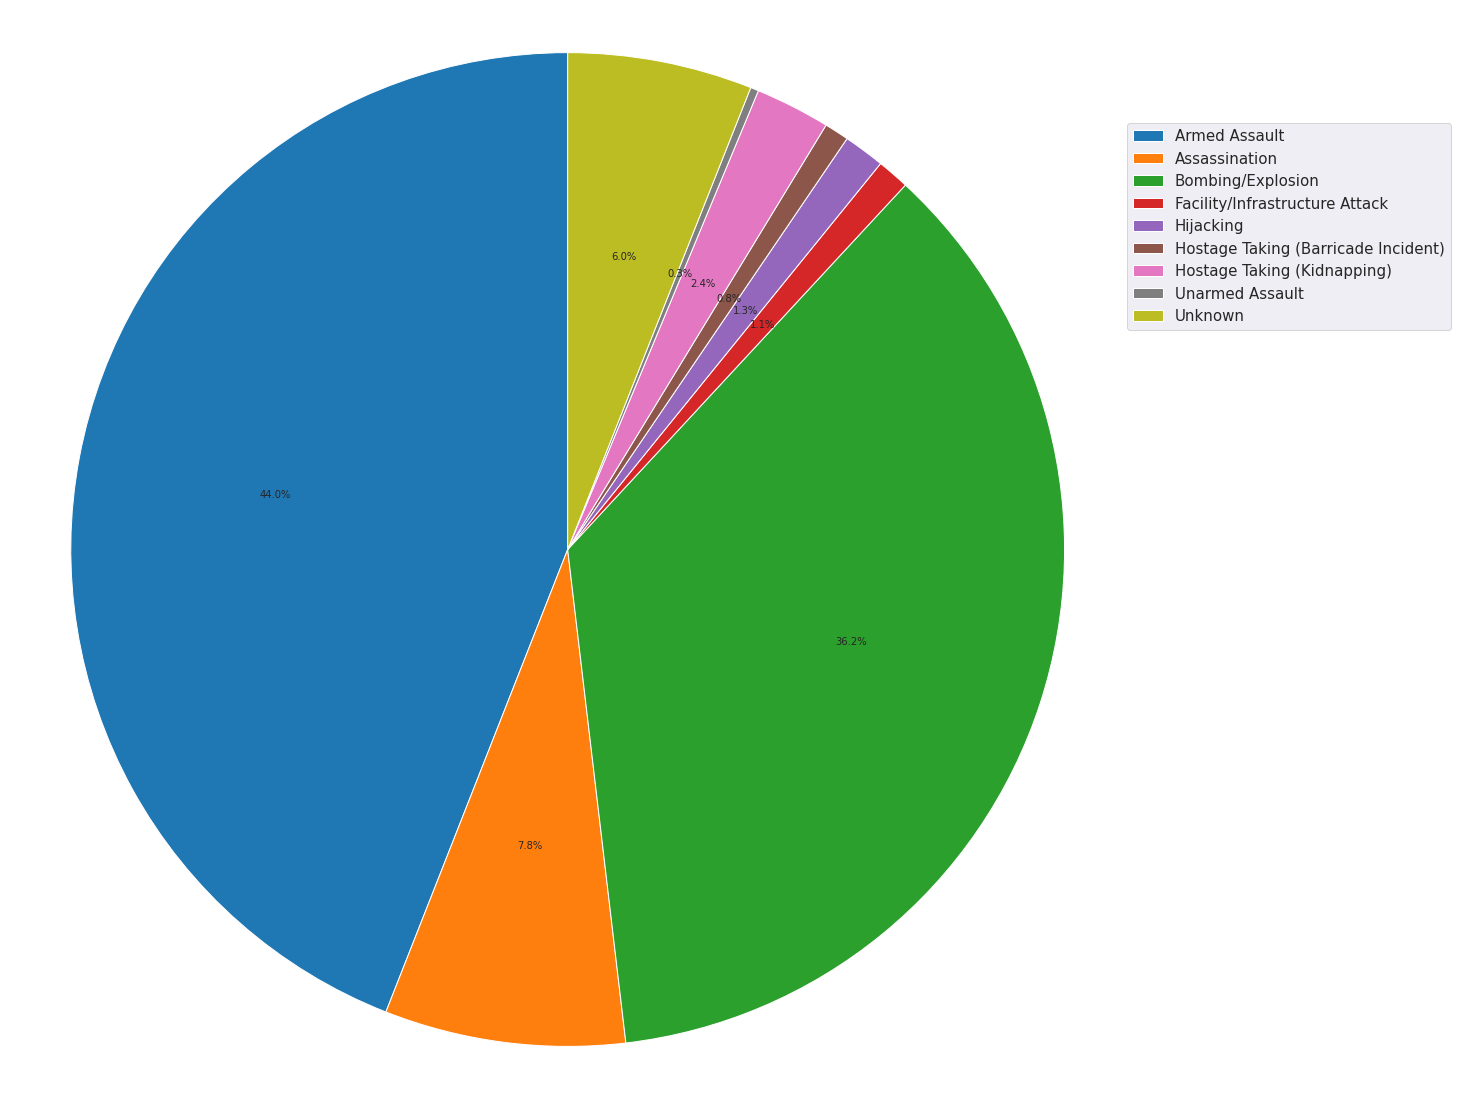

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
ax.pie(values, shadow=False, autopct="%1.1f%%", startangle=90)
ax.axis('equal')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15)
plt.rcParams['font.size'] = 10.0
plt.plot()
plt.show()

From the above graph plot we analyse that majority of terrorist attacks, over **50%**, have been caused due to **armed assaults**, whereas kills due to **assasination** is at a distant second position.

In [ ]:
df_copy.shape

(125694, 135)

In [ ]:
region_specific = df_copy.loc[:, ['region_txt' , 'targtype1_txt', 'nkill',]]
region_specific1 = region_specific[0:26122]
region_specific2 = region_specific[26122:52244]
region_specific3 = region_specific[52244:]

In [ ]:
print(region_specific1.shape)
print(region_specific2.shape)
print(region_specific3.shape)

(26122, 3)
(26122, 3)
(73450, 3)


I have deliberately divided the regions into 3 distinct categories for proper analysis owing to the humongous dataset size

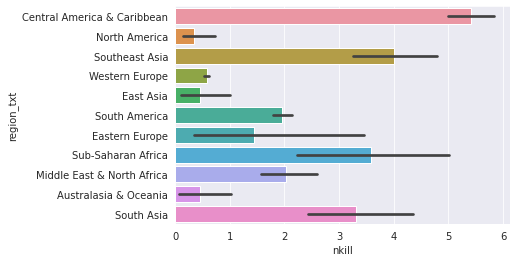

<Figure size 14400x7200 with 0 Axes>

In [ ]:
sns.barplot(x='nkill', y='region_txt', data=region_specific1)
plt.figure(figsize=(200, 100))
sns.set_context(context='poster', font_scale=0.5)

The above bar plot shows that **Central America and Caribbean region**, **SouthEast Asia** and **Sub-Saharan Africa** have been the global hotspots of terrorism in decreasing order.

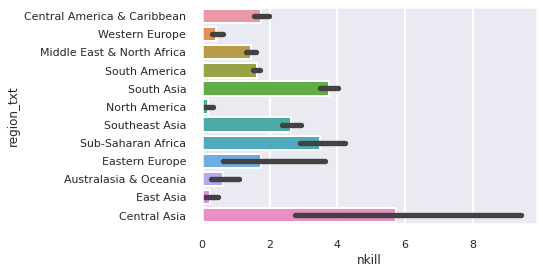

<Figure size 14400x7200 with 0 Axes>

In [ ]:
sns.barplot(x='nkill', y='region_txt', data=region_specific2)
plt.figure(figsize=(200, 100))
sns.set_context(context='poster', font_scale=0.5)

The above bar plot shows that **Central Asia**, **South Asia** and **Sub-Saharan Africa** have been the global hotspots of terrorism in decreasing order.



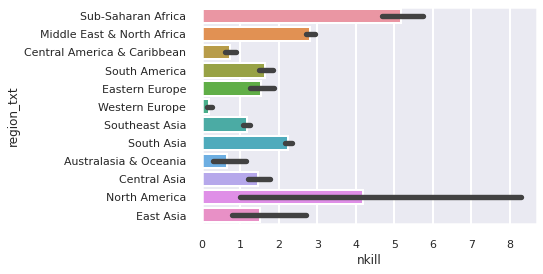

<Figure size 14400x7200 with 0 Axes>

In [ ]:
sns.barplot(x='nkill', y='region_txt', data=region_specific3)
plt.figure(figsize=(200, 100))
sns.set_context(context='poster', font_scale=0.5)

The above bar plot shows that **Central Asia**, **South Asia** and **Sub-Saharan Africa** have been the global hotspots of terrorism in decreasing order.

Overall, it can be concluded that **rich and prosperous nations** are less prone to terrorist attacks, whereas the attacks are **more prevalent** in the **developing and underdeveloped nations** of **Asia and Africa**. Hence the peacekeeping organisations should work more to 
promote education and literacy in these regions, so that gradually these nations move towards a progressive path and safety and security of its citizens is upheld.

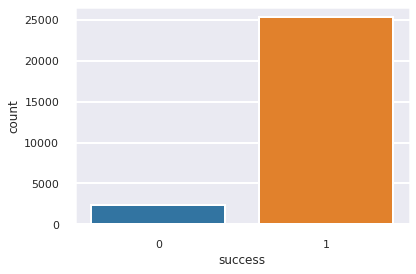

In [ ]:
dataMiddleEast = df_copy[df_copy['region'] == 10]
sns.countplot(x='success', data=dataMiddleEast)
sns.set_context('paper')
sns.set_style(style='darkgrid')

From the above analysis we can conclude that most of the attacks have been successfully carried out in middleEast and nearby regions, thereby asserting the prevalence of extemist groups in substantially high proportions.

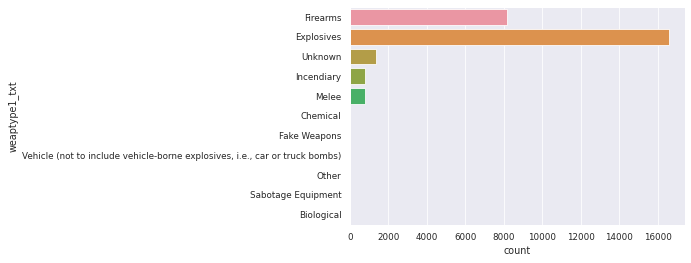

In [ ]:
sns.countplot(y='weaptype1_txt', data=dataMiddleEast, orient='h')
sns.set_context('paper')
sns.set_style(style='darkgrid')

Explosives and firearms are the major types of weapons used by the terrorists in Middle-East regions.

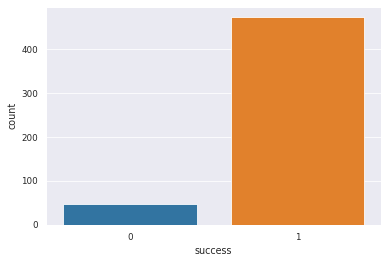

In [ ]:
dataCentralAsia = df_copy[df_copy['region'] == 7]
sns.countplot(x='success', data=dataCentralAsia)
sns.set_context('paper')
sns.set_style(style='darkgrid')

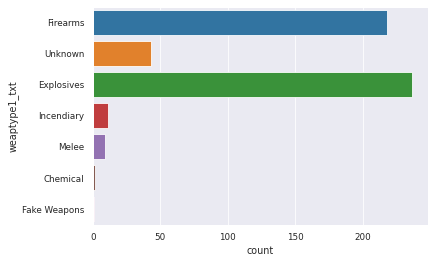

In [ ]:
sns.countplot(y='weaptype1_txt', data=dataCentralAsia, orient='h')
sns.set_context('paper')
sns.set_style(style='darkgrid')

<Figure size 1080x720 with 0 Axes>

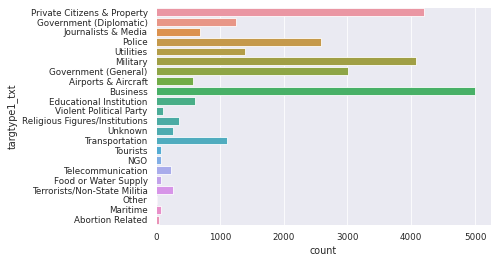

<Figure size 1080x720 with 0 Axes>

In [ ]:
sns.countplot(y='targtype1_txt', data=region_specific1, orient='h')
plt.figure(figsize=(15, 10))

From the above plot it can be concluded the maximum calamity has been caused to businesses and private citizens, which gives insights that terrorists have used the lives of innocents as a tool to assert their existence.